# 1. Introdiction 

## 1.1 About project

The Titanic Survivor Prediction is a classic machine learning problem that involves predicting whether a passenger on the Titanic survived or not based on various features such as their age, gender, ticket class, and cabin location. This problem is based on the sinking of the RMS Titanic on April 15, 1912, which is one of the most infamous maritime disasters in history.



## 1.2 Variable Explanations

*  PassengerId: The unique ID assigned to each passenger.
* Survived: Indicates whether a passenger survived or not (0 = No, 1 = Yes)
* Pclass: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name: The name of the passenger
* Sex: Gender of the passenger (Male or Female)
* Age: Age of the passenger
* SibSp: Number of siblings/spouses aboard the Titanic
* Parch: Number of parents/children aboard the Titanic
* Ticket: Ticket number of the passenger
* Fare: The passenger fare
* Cabin: Cabin number of the passenger
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



# 2. Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 3. Load the Titanic dataset


In [2]:
train_data =pd.read_csv("../input/titanic/train.csv")
test_data =pd.read_csv("../input/titanic/test.csv")

# 4. Exploratory Data Analaysis

## 4.1 EDA for train data

In [3]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S


In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


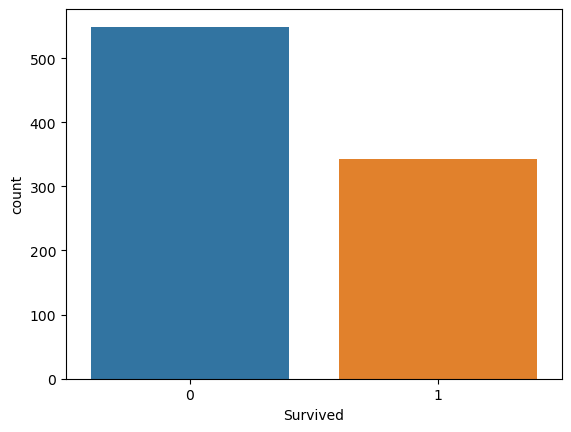

In [6]:
# View the distribution of the target variable
sns.countplot(x='Survived', data=train_data)
plt.show()

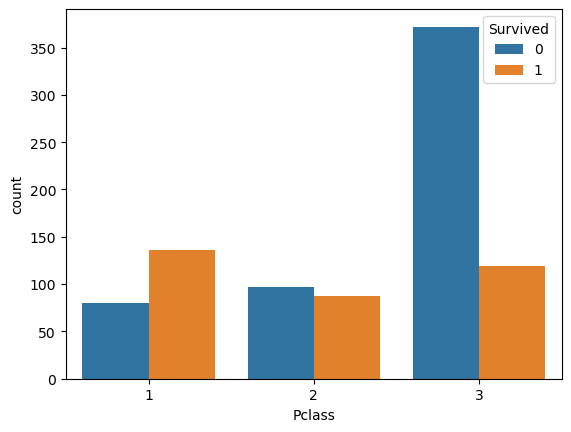

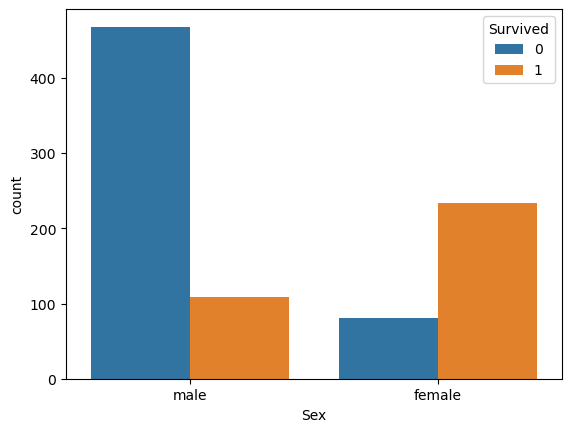

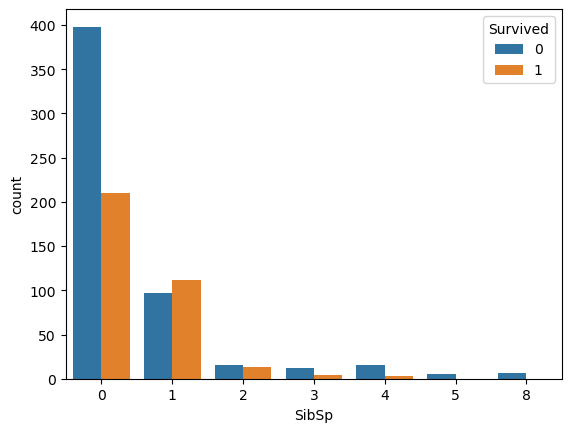

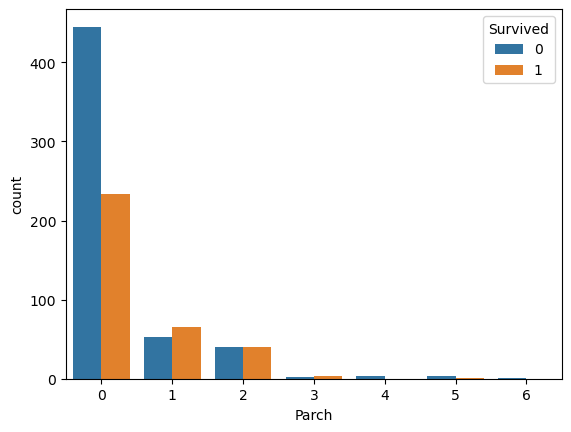

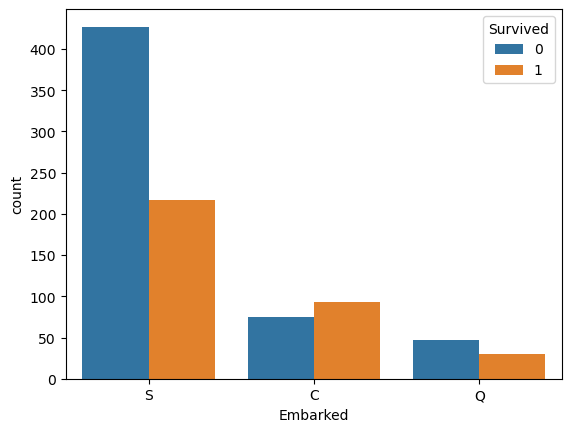

In [7]:
categorical_features = ['Pclass','Sex','SibSp','Parch','Embarked']
def visualize_categorical_columns(df,col_list,hue='Survived'):
    for col in col_list:
        # hue='Survived'
        sns.countplot(x=col,data=df,hue=hue)
        plt.show()
    return

visualize_categorical_columns(train_data, categorical_features)

## 4.2 EDA for test data

In [8]:
test_data.sample(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
395,1287,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S


In [9]:
test_data.sample(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S
156,1048,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S
274,1166,3,"Saade, Mr. Jean Nassr",male,NaN,0,0,2676,7.2250,NaN,C
73,965,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test_data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.3 Find number of missing values in each column

In [12]:


# Find the number of null values for each column
num_null = train_data.isnull().sum()

# Find the percentage of null values for each column
percent_null = round((train_data.isnull().sum() / len(train_data)) * 100, 2)

# Combine the results into a single DataFrame
null_values = pd.concat([num_null, percent_null], axis=1, keys=['Number of Null Values', 'Percentage of Null Values'])

# Print the results
print(null_values)


             Number of Null Values  Percentage of Null Values
PassengerId                      0                       0.00
Survived                         0                       0.00
Pclass                           0                       0.00
Name                             0                       0.00
Sex                              0                       0.00
Age                            177                      19.87
SibSp                            0                       0.00
Parch                            0                       0.00
Ticket                           0                       0.00
Fare                             0                       0.00
Cabin                          687                      77.10
Embarked                         2                       0.22


In [13]:


# Find the number of null values for each column
num_null = test_data.isnull().sum()

# Find the percentage of null values for each column
percent_null = round((test_data.isnull().sum() / len(test_data)) * 100, 2)

# Combine the results into a single DataFrame
null_values = pd.concat([num_null, percent_null], axis=1, keys=['Number of Null Values', 'Percentage of Null Values'])

# Print the results
print(null_values)


             Number of Null Values  Percentage of Null Values
PassengerId                      0                       0.00
Pclass                           0                       0.00
Name                             0                       0.00
Sex                              0                       0.00
Age                             86                      20.57
SibSp                            0                       0.00
Parch                            0                       0.00
Ticket                           0                       0.00
Fare                             1                       0.24
Cabin                          327                      78.23
Embarked                         0                       0.00


# 5. Data preprocessing

## 5.1 Fill missing values

In [14]:
# Fill missing values for Age with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values for Embarked with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill missing values for Age with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)



## 5.2 Encode categorical variables

In [15]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

## 5.3 Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

## 5.4 Split the data into training and validation sets


In [17]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Modelling

## 6.1 Model Training

In [18]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Train a support vector machine
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)




SVC(C=1, probability=True, random_state=42)

## 5.2 Evaluate the models on the validation set


In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score
models = [('Logistic Regression', lr_model), ('Random Forest', rf_model), ('SVM', svm_model)]

for name, model in models:
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1] # probability estimates of the positive class
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    print(f'{name}: Validation accuracy = {accuracy:.4f}, AUC = {auc:.4f}')


Logistic Regression: Validation accuracy = 0.8101, AUC = 0.8829
Random Forest: Validation accuracy = 0.8156, AUC = 0.8902
SVM: Validation accuracy = 0.8156, AUC = 0.8360


# 7. Making a Submission

## 7.1 Make predictions on the test data


In [20]:
X_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


## 7.2 Save the predictions to a CSV file 

In [21]:
# Ensemble the predictions using majority voting
ensemble_pred = np.round((lr_pred + rf_pred + svm_pred) / 3).astype(int)
 

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': ensemble_pred})
output.to_csv('submission.csv', index=False)